<a href="https://colab.research.google.com/github/Kaue557/Analise-de-Dados/blob/main/Imersao_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA **1**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape # linhas/colunas

(133349, 11)

In [8]:
linhas, colunas = df.shape[0], df.shape[1] #deixando bunitin
print("linhas:", linhas, "/ colunas:", colunas)

linhas: 133349 / colunas: 11


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
column_translations = {
    'work_year': 'ano_trabalho',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'tipo_emprego',
    'job_title': 'titulo_cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_salario',
    'salary_in_usd': 'salario_em_usd',
    'employee_residence': 'residencia_empregado',
    'remote_ratio': 'taxa_remoto',
    'company_location': 'local_empresa',
    'company_size': 'tamanho_empresa'
}

df = df.rename(columns=column_translations)
display(df.head())

,ano_trabalho,nivel_experiencia,tipo_emprego,titulo_cargo,salario,moeda_salario,salario_em_usd,residencia_empregado,taxa_remoto,local_empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [11]:
df["nivel_experiencia"].value_counts()

,count
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
df["tipo_emprego"].value_counts()

,count
tipo_emprego,
FT,132563
CT,394
PT,376
FL,16


In [13]:
df["taxa_remoto"].value_counts() # 0 = presencial / 100 = remoto / 50 = hibrido

,count
taxa_remoto,
0,105312
100,27718
50,319


In [14]:
taxa_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['taxa_remoto'] = df['taxa_remoto'].replace(taxa_remoto)
display(df['taxa_remoto'].value_counts())

,count
taxa_remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [15]:
nivel_experiencia = {
    'SE': 'Senior',
    'MI': 'Intermediario',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['nivel_experiencia'] = df['nivel_experiencia'].replace(nivel_experiencia)
display(df['nivel_experiencia'].value_counts())

,count
nivel_experiencia,
Senior,77241
Intermediario,40465
Junior,12443
Executivo,3200


In [16]:
tipo_emprego = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}

df['tipo_emprego'] = df['tipo_emprego'].replace(tipo_emprego)
display(df['tipo_emprego'].value_counts())

,count
tipo_emprego,
Tempo Integral,132563
Contrato,394
Meio Período,376
Freelancer,16


In [17]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [18]:
df.head()

,ano_trabalho,nivel_experiencia,tipo_emprego,titulo_cargo,salario,moeda_salario,salario_em_usd,residencia_empregado,taxa_remoto,local_empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,M
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,M
2,2025.0,Intermediario,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,M
3,2025.0,Intermediario,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,M
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,M


In [19]:
df.describe(include="object")

,nivel_experiencia,tipo_emprego,titulo_cargo,moeda_salario,residencia_empregado,taxa_remoto,local_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,M
freq,77241,132563,17314,126140,119579,105312,119641,129561


# AULA **2**

In [ ]:
df.isnull().value_counts()

In [ ]:
df.isnull().sum()

In [22]:
df['ano_trabalho'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
import numpy as np

df_salarios = pd.DataFrame({
    "nome" : ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    "salario" : [4000, np.nan, 5000, np.nan, 100000]
})

# calcula media e substitui nulos + arredondamento
df_salarios["salario_media"] = df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2))
df_salarios

# calcula mediana e substitui nulos
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(df_salarios["salario"].median())
df_salarios

In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia" : ["Segunda", "Terca", "Quarta", "Quinta", "Sexta"],
    "Temperatura" : [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["Preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia" : ["Segunda", "Terca", "Quarta", "Quinta", "Sexta"],
    "Temperatura" : [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["Preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

In [27]:
df_limpo = df.dropna()

In [28]:
df_limpo.isnull().sum()

,0
ano_trabalho,0
nivel_experiencia,0
tipo_emprego,0
titulo_cargo,0
salario,0
moeda_salario,0
salario_em_usd,0
residencia_empregado,0
taxa_remoto,0
local_empresa,0


In [ ]:
df_limpo.head()

In [ ]:
df_limpo.info()

In [31]:
df_limpo = df_limpo.assign(ano_trabalho = df_limpo['ano_trabalho'].astype('Int64'))

# **AULA 3**

In [ ]:
df_limpo.head()

<Axes: title={'center': 'Distribuicao de Senioridade'}, xlabel='nivel_experiencia'>

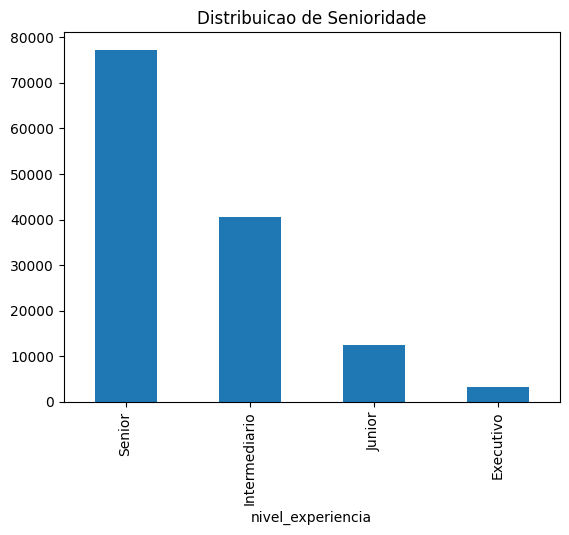

In [35]:
df_limpo["nivel_experiencia"].value_counts().plot(kind = 'bar', title = 'Distribuicao de Senioridade')

In [37]:
import seaborn as sns

<Axes: xlabel='nivel_experiencia', ylabel='salario_em_usd'>

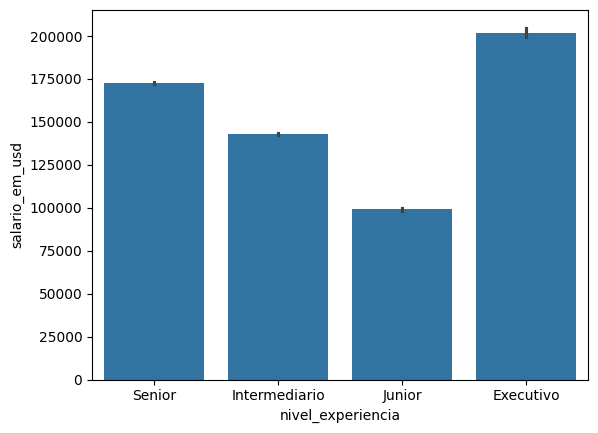

In [38]:
sns.barplot(data = df_limpo, x = 'nivel_experiencia', y = 'salario_em_usd')

In [39]:
import matplotlib.pyplot as plt

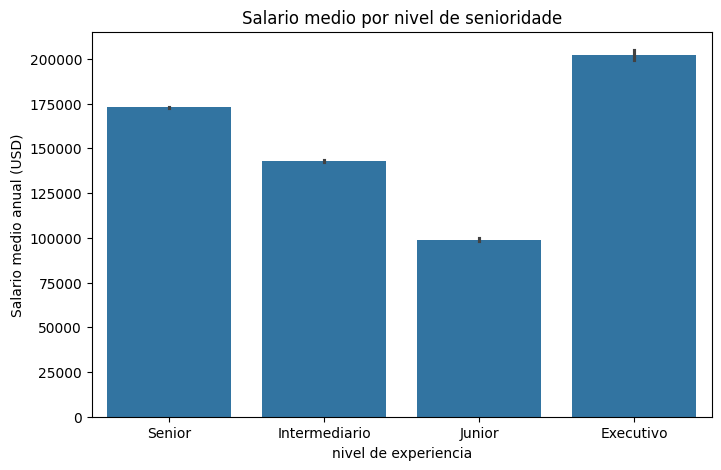

In [41]:
plt.figure(figsize = (8, 5))
sns.barplot(data = df_limpo, x = 'nivel_experiencia', y = 'salario_em_usd')
plt.title("Salario medio por nivel de senioridade")
plt.xlabel("nivel de experiencia")
plt.ylabel("Salario medio anual (USD)")
plt.show()

In [46]:
#media do salario anual para niveis de senioridade em ordem decrescente
df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().round(2).sort_values(ascending=False)

,salario_em_usd
nivel_experiencia,
Executivo,202027.67
Senior,172850.84
Intermediario,143044.85
Junior,99034.96


In [47]:
ordem = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().round(2).sort_values(ascending=False).index

In [48]:
ordem

Index(['Executivo', 'Senior', 'Intermediario', 'Junior'], dtype='object', name='nivel_experiencia')

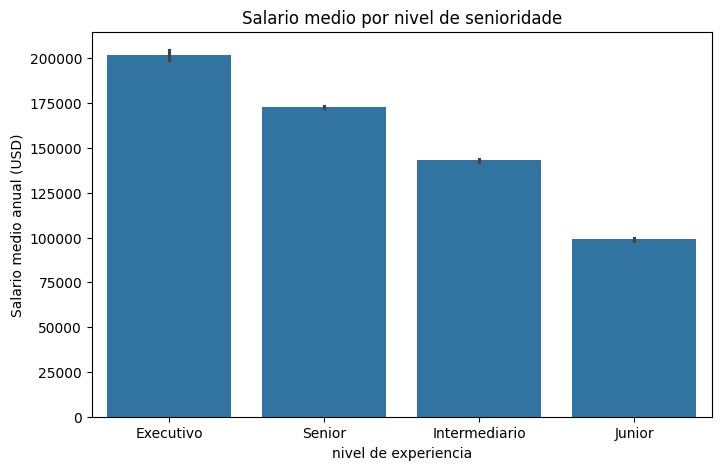

In [49]:
plt.figure(figsize = (8, 5))
sns.barplot(data = df_limpo, x = 'nivel_experiencia', y = 'salario_em_usd', order = ordem)
plt.title("Salario medio por nivel de senioridade")
plt.xlabel("nivel de experiencia")
plt.ylabel("Salario medio anual (USD)")
plt.show()

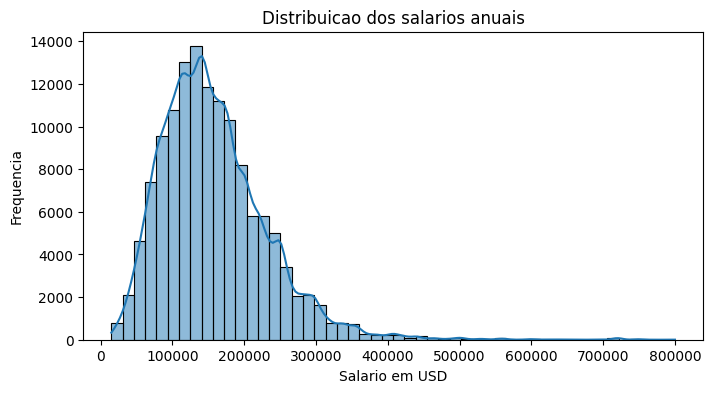

In [60]:
plt.figure(figsize = (8, 4))
sns.histplot(df_limpo["salario_em_usd"], bins = 50, kde = True)
plt.title("Distribuicao dos salarios anuais")
plt.xlabel("Salario em USD")
plt.ylabel("Frequencia")
plt.show()

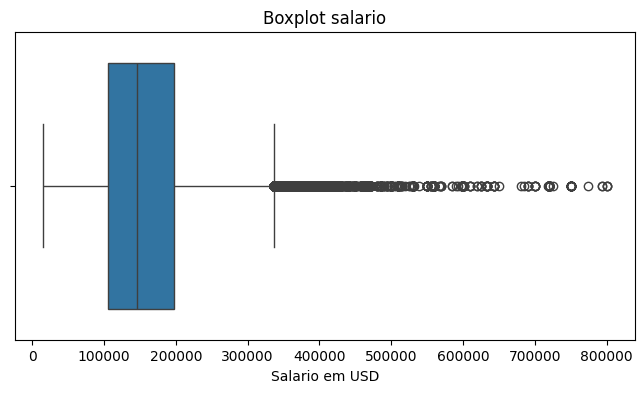

In [61]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = df_limpo["salario_em_usd"])
plt.title("Boxplot salario")
plt.xlabel("Salario em USD")
plt.show()

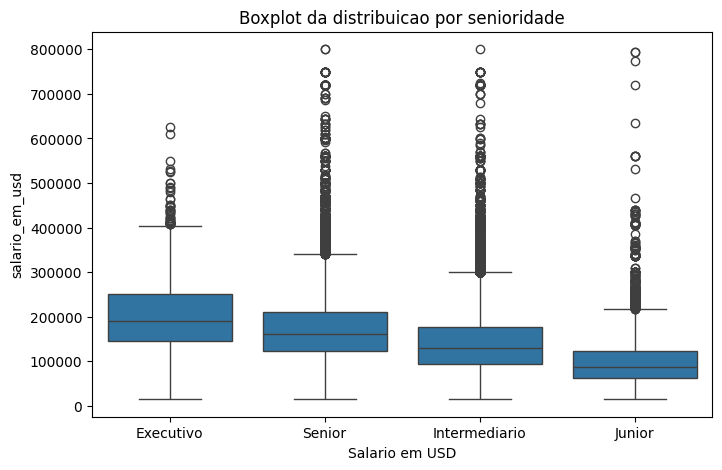

In [66]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'nivel_experiencia', y = 'salario_em_usd', data = df_limpo, order = ordem)
plt.title("Boxplot da distribuicao por senioridade")
plt.xlabel("Salario em USD")
plt.show()

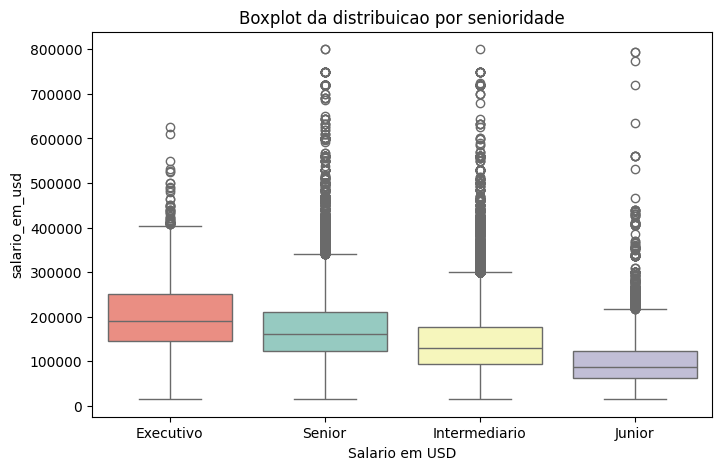

In [69]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'nivel_experiencia', y = 'salario_em_usd', data = df_limpo, order = ordem, palette = 'Set3', hue = 'nivel_experiencia')
plt.title("Boxplot da distribuicao por senioridade")
plt.xlabel("Salario em USD")
plt.show()

In [70]:
import plotly.express as px

In [71]:
df_media_salario_plotly = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().round(2).reindex(ordem).reset_index()
fig = px.bar(
    df_media_salario_plotly,
    x='nivel_experiencia',
    y='salario_em_usd',
    title='Média Salarial por Nível de Senioridade',
    labels={'nivel_experiencia': 'Nível de Experiência', 'salario_em_usd': 'Média Salarial (USD)'},
    color='nivel_experiencia', # Para cores diferentes por barra
    template='plotly_white'
)
fig.update_layout(xaxis_title_text='Nível de Experiência', yaxis_title_text='Média Salarial Anual (USD)')
fig.show()

In [76]:
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names = 'tipo_trabalho',
    values = 'quantidade',
    title='proporcao dos tipos de trabalho',
    hole = 0.5
)
fig.show()

In [85]:
from matplotlib import text
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names = 'tipo_trabalho',
    values = 'quantidade',
    title='proporcao dos tipos de trabalho',
    hole = 0.4
)
fig.update_traces(textinfo = 'percent + label')
fig.show()